Para leer los datos, se lee el archivo de texto
Cargar los datos de forma aleatoria (permutar lineas, para que se randomize, se deben revolver también sus clases)
Matriz de data, y array de clases
Rows: 150, Columns: 4

Clase para crear datos y etiquetas (150,4 para caracteristicas) y (150 para clases)s
Para X_train y X_test se deben pasar arreglos de objetos del tipo de la clase creada
Convertir la matriz leida que tiene 5 col en el array a una matriz con 4 col, y un array con todas las clases para ello se redimensiona el vector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets
import seaborn as sns
import pandas as pd
#from sklearn.utils import shuffle
import random

ModuleNotFoundError: No module named 'sklearn'

In [102]:
def shuffle_lists(lst, lst2):
    n = len(lst2)
    for i in range(n - 1, 0, -1):
        j = random.randint(0, i)
        lst[i], lst[j] = np.copy(lst[j]), np.copy(lst[i])
        lst2[i], lst2[j] = lst2[j], lst2[i]
    return lst, lst2

def shuffle(data, target):
    # Hacer un shuffle de las listas
    dataRand, targetRand = shuffle_lists(data, target)
    return dataRand, targetRand

In [103]:
# Leer el archivo de texto
class Data:
    def __init__(self):
        self._data = None
        self._target = None
        self._randomData = None
        self._randomTarget = None
        
    # Metodos getters
    def getRandomData(self):
        return self._randomData
    
    def getRandomTarget(self):
        return self._randomTarget
    
    def load_data(self):
        with open("iris.data", "r") as datos:
            valores = []
            for linea in datos:
                valores.append([x for x in linea.strip().split(",")])
            #print(valores[:5])
            
            # Crear matriz para guardar los valores de data
            data = np.zeros((len(valores), 4))
            for i in range(len(valores)):
                data[i][0], data[i][1], data[i][2], data[i][3] = float(valores[i][0]), float(valores[i][1]), float(valores[i][2]), float(valores[i][3])
            
            self._data = np.copy(data)
            
            # Crear matriz para guardar los valores de target (clases)
            target = np.zeros((len(valores)))
            for i in range(len(valores)):
                if valores[i][4] == 'Iris-setosa':
                    target[i] = 0
                elif valores[i][4] == 'Iris-versicolor':
                    target[i] = 1
                elif valores[i][4] == 'Iris-virginica':
                    target[i] = 2
                else:
                    target[i] = None
            
            self._target = np.copy(target)
            #print(target)
        print("Se cargaron los datos")
    
    def randomizer(self):
        # Crear matriz auxiliar para permutar filas de la matriz de datos
        numDatos, numChar = self._data.shape
        #randomData = np.zeros((numDatos, numChar))
        randomData = np.copy(self._data)
        # Crear arreglo auxiliar para permutar clases
        numTarget = self._target.shape
        #randomTarget = np.zeros((numTarget))
        randomTarget = np.copy(self._target)
        
        # Tomar un valor random desde 0 hasta numDatos y mezclar
        a, b = shuffle(randomData, randomTarget)
        
        # Guardar la matriz con filas intercambiadas y el arreglo con datos intercambiados
        self._randomData = np.copy(a)
        self._randomTarget = np.copy(b)
        print("Datos aleatorizados")

In [104]:
data = Data()
data.load_data()
data.randomizer()

Se cargaron los datos
Datos aleatorizados


In [105]:
sns.set()

In [7]:
# data = datasets.load_iris()

In [106]:
# data.keys()

In [107]:
# Devuelve los datos con los que se va a trabajar
datos = data.getRandomData()
datos[:5]

array([[5. , 3.5, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 2.7, 3.9, 1.4],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 3.2, 4.5, 1.5]])

In [93]:
# Muestra los 4 datos que contiene el arreglo
feature_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [94]:
# Datos que se quieren predecir (clases a las que corresponden)
target = data.getRandomTarget()
target

array([2., 0., 1., 0., 2., 2., 2., 0., 0., 2., 1., 0., 0., 2., 1., 2., 2.,
       0., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2., 1., 1., 0., 1., 0.,
       1., 0., 0., 2., 0., 1., 1., 1., 0., 1., 2., 0., 1., 2., 1., 0., 1.,
       1., 1., 2., 0., 1., 1., 2., 1., 1., 0., 0., 0., 0., 2., 2., 2., 1.,
       0., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 0., 2.,
       0., 1., 2., 2., 2., 0., 0., 2., 2., 1., 2., 0., 2., 2., 2., 2., 1.,
       2., 0., 0., 1., 0., 1., 2., 1., 0., 0., 2., 0., 2., 0., 1., 1., 0.,
       2., 2., 2., 1., 0., 1., 0., 1., 2., 2., 0., 1., 1., 2., 0., 0., 1.,
       0., 1., 1., 0., 2., 0., 2., 0., 0., 0., 1., 1., 1., 0.])

In [95]:
# Nombres de las clases
target_names = ['setosa', 'versicolor', 'virginica']
target_names

['setosa', 'versicolor', 'virginica']

In [96]:
# Dataframe para visualizar los datos
df = pd.DataFrame(datos, columns=feature_names)
df["target"] = target
df["target_name"] = df["target"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})
#df.head()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.9,3.0,5.1,1.8,2.0,Virginica
1,4.9,3.1,1.5,0.1,0.0,Setosa
2,5.7,2.6,3.5,1.0,1.0,Versicolor
3,4.4,3.0,1.3,0.2,0.0,Setosa
4,5.6,2.8,4.9,2.0,2.0,Virginica
...,...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0.0,Setosa
146,6.4,3.2,4.5,1.5,1.0,Versicolor
147,6.3,2.3,4.4,1.3,1.0,Versicolor
148,4.9,2.4,3.3,1.0,1.0,Versicolor


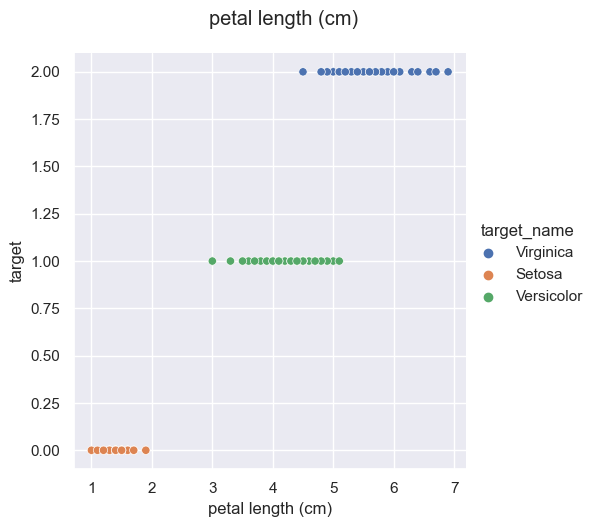

In [113]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle(col, y=1.05)
plt.show()

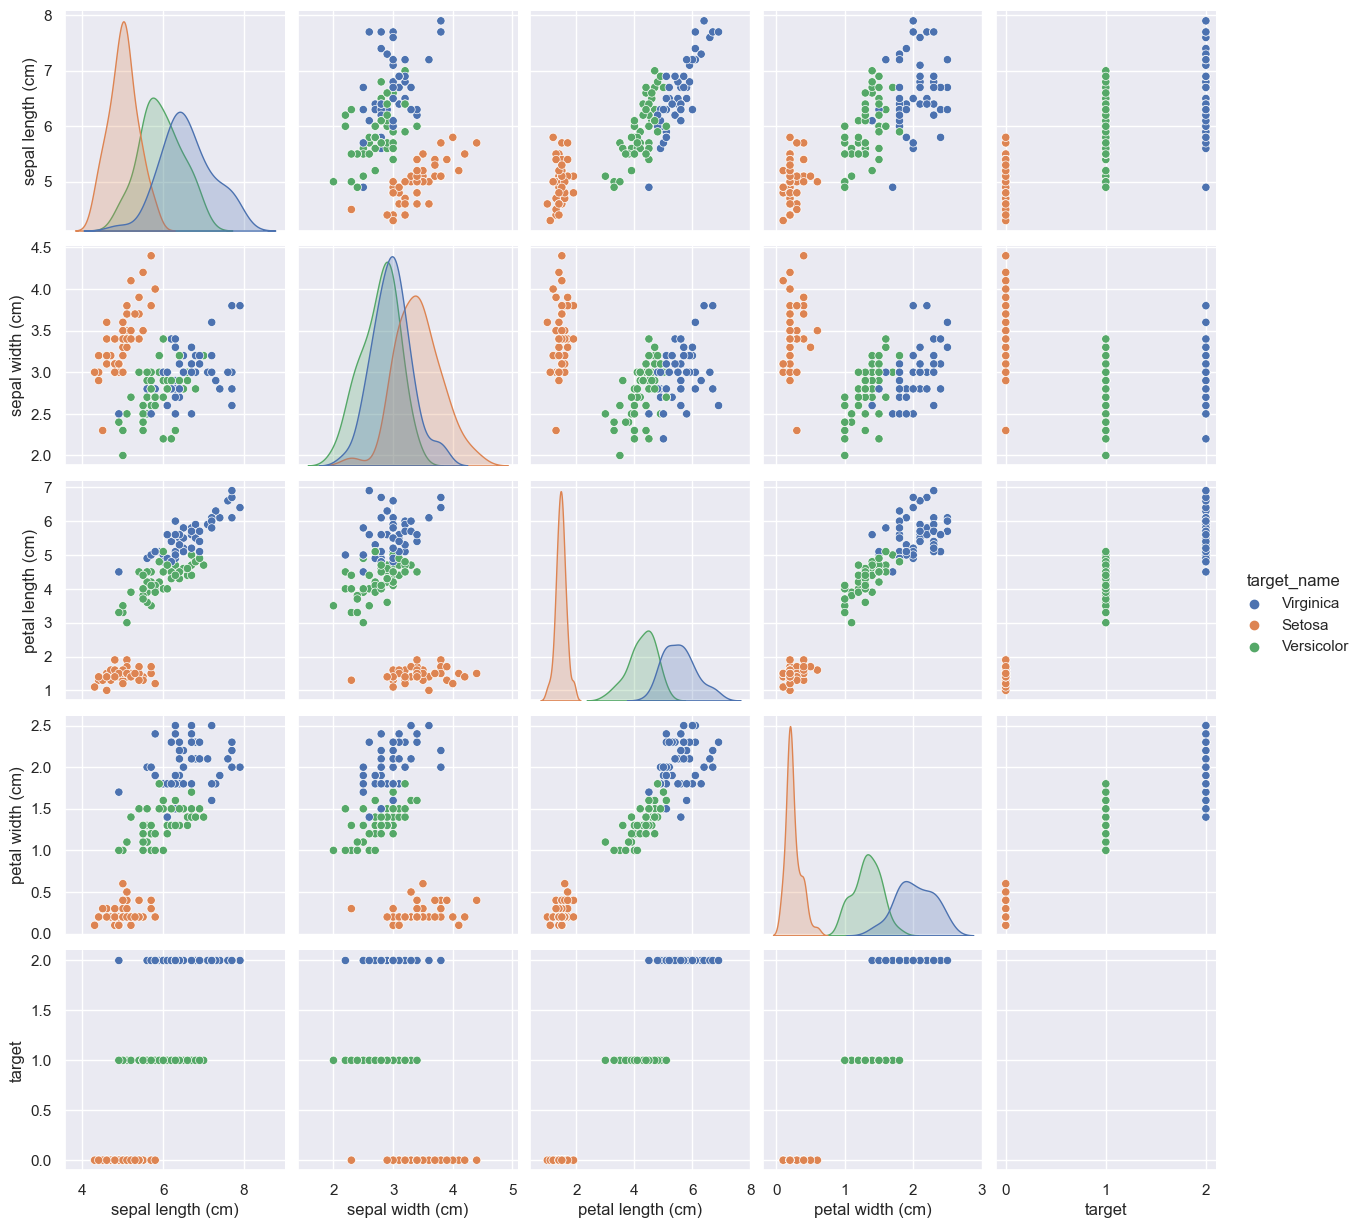

In [114]:
# Visualizar datos
sns.pairplot(df, hue="target_name")
plt.show()

In [115]:
# sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predict)
# plt.show()

In [116]:
# Dividir datos de entrenamiento y de test
# from sklearn.model_selection import train_test_split
df_train, df_test = df[:100], df[100:150]

In [117]:
# Preparar datos de entrenamiento
X_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

In [118]:
# Preparar datos para test
X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

In [119]:
def euclidean_distance(x1, x2):
    m, n = x1.shape # m= 112, n=4
    distances = np.zeros(m)
    
    for i in range(m):
        distances[i] = np.sqrt((x1[i][0] - x2[0])**2 + (x1[i][1] - x2[1])**2 + (x1[i][2] - x2[2])**2 + (x1[i][3] - x2[3])**2)
    return distances

In [120]:
# Prueba
distance = euclidean_distance(X_train, X_train[0])
# print(distance)

In [121]:
class knnAlgorithm:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X # Imagenes
        self.y_train = y # Clases
        #print("Datos guardados")
        #print("X_train")
        #print(self.X_train)
        #print("y_train")
        #print(self.y_train)
        
    def predict(self, X):
        print("Preparando predicciones")
        y_pred = []
        
        # Obtener la distancia a todos los puntos
        for x in X:
            distances = euclidean_distance(self.X_train, x)
            #print("Distances")
            #print(distances)
        
            # Ordenar las distancias y devolver solo los primeros k vecinos
            sort_distance = np.argsort(distances)[: self.k]
            #print("Sort distance")
            #print(sort_distance)

            # Guardar las distancias en un arreglo
            knn = self.y_train[sort_distance]
            #print("Knn neighbors")
            #print(knn)

            # Contar las clases más coumnes
            label, counts = np.unique(knn, return_counts = True)
            #print("Most common label, counts: ", label, counts)

            y_pred.append(label[np.argmax(counts)])
        return np.array(y_pred)
    
    def des(self, X):
        #y_pred = []
        #for x in X:
            #y_pred.append(self.predict(x))
        print("Preparando predicciones...")
        y_pred = [self.predict(x) for x in X]
        return np.array(y_pred)

# Prueba con los datos de entrenamiento

In [134]:
model = knnAlgorithm(k=3)
model.fit(X_train, y_train)
# X_train

In [135]:
y_pred = model.predict(X_train)
y_pred

Preparando predicciones


array([2., 0., 1., 0., 2., 2., 2., 0., 0., 2., 1., 0., 0., 2., 1., 2., 2.,
       0., 1., 0., 2., 1., 0., 0., 2., 0., 1., 1., 2., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 2., 0., 1., 2., 1., 0., 1.,
       1., 1., 2., 0., 1., 1., 2., 1., 1., 0., 0., 0., 0., 2., 2., 2., 1.,
       0., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 0., 2.,
       0., 1., 2., 2., 2., 0., 0., 2., 2., 1., 2., 0., 2., 2., 2.])

In [124]:
y_train

array([2., 0., 1., 0., 2., 2., 2., 0., 0., 2., 1., 0., 0., 2., 1., 2., 2.,
       0., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2., 1., 1., 0., 1., 0.,
       1., 0., 0., 2., 0., 1., 1., 1., 0., 1., 2., 0., 1., 2., 1., 0., 1.,
       1., 1., 2., 0., 1., 1., 2., 1., 1., 0., 0., 0., 0., 2., 2., 2., 1.,
       0., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 0., 2.,
       0., 1., 2., 2., 2., 0., 0., 2., 2., 1., 2., 0., 2., 2., 2.])

In [125]:
mask = y_pred == y_train
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [126]:
model_accuracy = np.mean(y_pred == y_train)
print(f"Model accuracy: {model_accuracy * 100:.2f}%")

Model accuracy: 98.00%


# Mostrar predicciones

In [127]:
# Datos que no fueron clasificados correctamente
X_train[~mask]

array([[6.3, 2.5, 4.9, 1.5],
       [4.9, 2.5, 4.5, 1.7]])

In [128]:
df_predict = df_train.copy()
df_predict["predicciones"] = y_pred
df_predict["label"] = df_predict["predicciones"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})
df_predict["prediccion_corecta"] = mask
df_predict.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,predicciones,label,prediccion_corecta
0,5.9,3.0,5.1,1.8,2.0,Virginica,2.0,Virginica,True
1,4.9,3.1,1.5,0.1,0.0,Setosa,0.0,Setosa,True
2,5.7,2.6,3.5,1.0,1.0,Versicolor,1.0,Versicolor,True
3,4.4,3.0,1.3,0.2,0.0,Setosa,0.0,Setosa,True
4,5.6,2.8,4.9,2.0,2.0,Virginica,2.0,Virginica,True


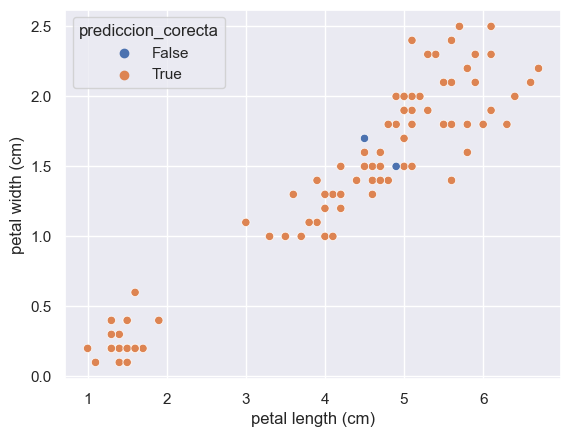

In [129]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediccion_corecta", data=df_predict)
plt.show()

# Prueba con los datos de test

In [130]:
y_pred_test = model.predict(X_test)
y_pred_test

Preparando predicciones


array([2., 1., 2., 0., 0., 1., 0., 1., 2., 1., 0., 0., 2., 0., 2., 0., 1.,
       1., 0., 2., 2., 2., 2., 0., 1., 0., 1., 2., 2., 0., 1., 1., 2., 0.,
       0., 1., 0., 2., 1., 0., 2., 0., 2., 0., 0., 0., 1., 1., 1., 0.])

In [131]:
y_test

array([2., 1., 2., 0., 0., 1., 0., 1., 2., 1., 0., 0., 2., 0., 2., 0., 1.,
       1., 0., 2., 2., 2., 1., 0., 1., 0., 1., 2., 2., 0., 1., 1., 2., 0.,
       0., 1., 0., 1., 1., 0., 2., 0., 2., 0., 0., 0., 1., 1., 1., 0.])

In [132]:
y_pred_test == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [133]:
model_accuracy_test = np.mean(y_pred_test == y_test)
print(f"Model accuracy: {model_accuracy_test * 100:.2f}%")

Model accuracy: 96.00%
